In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split

In [3]:
with_mask_files = os.listdir('data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [4]:
without_mask_files = os.listdir('data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [5]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


## Creating Labels for the two class of Images**

In [6]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [7]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [8]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [9]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


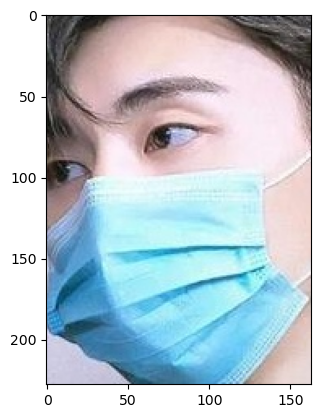

In [10]:
# displaying with mask image
img = mpimg.imread('data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

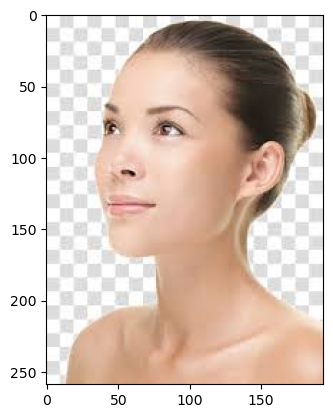

In [11]:
# displaying without mask image
img = mpimg.imread('data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [12]:
# Image Processing

1. Resize the Images

2. Convert the images to numpy arrays

In [13]:
# convert images to numpy arrays+

with_mask_path = 'data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
type(data)

list

In [16]:
len(data)

7553

In [17]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [18]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [19]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [20]:
print(Y)

[1 1 1 ... 0 0 0]


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [23]:
# scaling the data

In [24]:
x_train_scaled = X_train/255


In [25]:
x_test_scaled = X_test/255

In [26]:
x_train_scaled[0]

array([[[0.88627451, 0.91764706, 0.78823529],
        [0.82745098, 0.84705882, 0.7372549 ],
        [0.7372549 , 0.7372549 , 0.6627451 ],
        ...,
        [0.72941176, 0.70980392, 0.64705882],
        [0.70196078, 0.68627451, 0.58823529],
        [0.65098039, 0.70980392, 0.53333333]],

       [[0.87843137, 0.89411765, 0.85490196],
        [0.78823529, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75294118],
        ...,
        [0.77254902, 0.74509804, 0.71372549],
        [0.68627451, 0.66666667, 0.6       ],
        [0.63529412, 0.70588235, 0.56078431]],

       [[0.80392157, 0.8       , 0.83137255],
        [0.86666667, 0.8627451 , 0.88627451],
        [0.76470588, 0.75294118, 0.76862745],
        ...,
        [0.71764706, 0.68235294, 0.67843137],
        [0.6745098 , 0.65490196, 0.62352941],
        [0.70980392, 0.78039216, 0.67058824]],

       ...,

       [[0.61176471, 0.69019608, 0.77254902],
        [0.62352941, 0.70588235, 0.76862745],
        [0.64313725, 0

In [27]:
# Building a CNN model 

In [28]:
import tensorflow as tf 
from tensorflow import keras


In [29]:
number_of_classes =2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size =(3,3),activation ="relu",input_shape =(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size =(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size =(3,3),activation ="relu",input_shape =(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size =(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation ="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation ="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(number_of_classes,activation ="sigmoid"))







C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# compile the neural network 

In [31]:
model.compile(optimizer ="adam",loss ="sparse_categorical_crossentropy",metrics =["acc"])

In [32]:
# training the neaural network 

In [33]:
history = model.fit(x_train_scaled,Y_train,validation_split =0.1,epochs =5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 91s 495ms/step - acc: 0.6631 - loss: 0.6815 - val_acc: 0.8843 - val_loss: 0.2761
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 138s 479ms/step - acc: 0.8736 - loss: 0.3156 - val_acc: 0.9025 - val_loss: 0.2458
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 82s 482ms/step - acc: 0.8915 - loss: 0.2802 - val_acc: 0.9157 - val_loss: 0.2247
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 82s 483ms/step - acc: 0.9105 - loss: 0.2212 - val_acc: 0.9372 - val_loss: 0.2057
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 83s 487ms/step - acc: 0.9242 - loss: 0.1859 - val_acc: 0.9339 - val_loss: 0.2036


In [32]:
# model evaluation

In [34]:
loss,accuracy = model.evaluate(x_test_scaled,Y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - acc: 0.9288 - loss: 0.1825


In [35]:
print("test Accuracy",accuracy)


test Accuracy 0.9285241365432739


In [36]:
# plot  loss value 

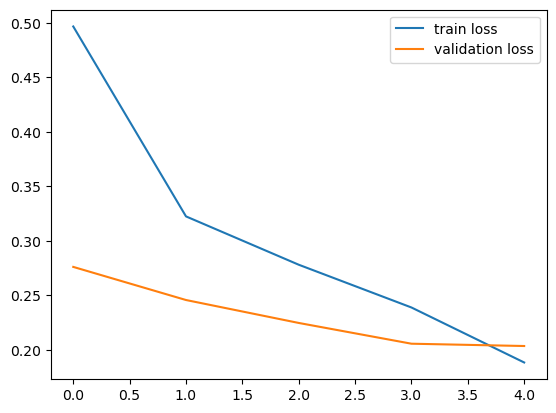

In [37]:
h = history
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()



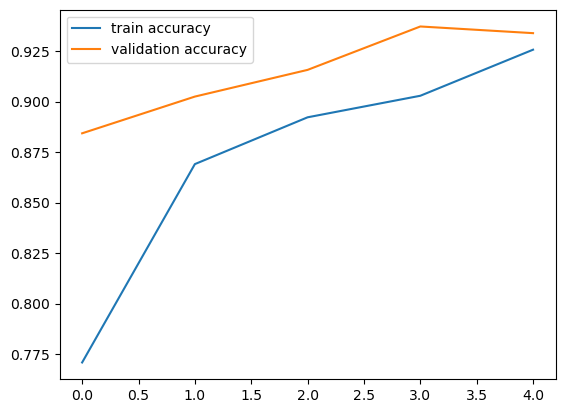

In [38]:
# Plot the accuracy values
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()


In [38]:
# predictive system 

Path of the image to be predicted:  data/without_mask/without_mask_1018.jpg


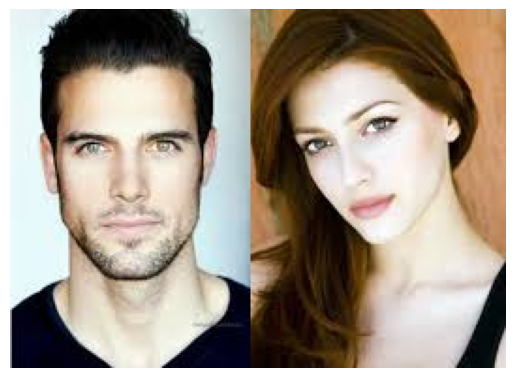

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Prediction Probabilities: [[0.5616269 0.4647167]]
Predicted Label: 0
The person in the image is not wearing a mask.


In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Prompt for the image path
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

# Check if the image was loaded successfully
if input_image is None:
    print("Error: Could not load the image. Please check the path and try again.")
else:
    # Convert the color from BGR (OpenCV format) to RGB (matplotlib format) for display
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(input_image_rgb)
    plt.axis('off')  # Hide the axes for a cleaner display
    plt.show()

    # Preprocess the image for model input
    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

    # Make the prediction using the CNN model
    input_prediction = model.predict(input_image_reshaped)
    print("Prediction Probabilities:", input_prediction)

    # Get the predicted label (assuming 1 = "wearing mask" and 0 = "not wearing mask")
    input_pred_label = np.argmax(input_prediction)
    print("Predicted Label:", input_pred_label)

    # Interpret and display the result
    if input_pred_label == 1:
        print('The person in the image is wearing a mask.')
    else:
        print('The person in the image is not wearing a mask.')


In [50]:
# Save the model to a pickle file
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
